In [0]:
!pip install pystan

    100% |████████████████████████████████| 50.0MB 683kB/s 
    100% |████████████████████████████████| 2.1MB 11.6MB/s 


This project uses pricing data from 100 stores in Berlin, Germany to understand how prices vary across different brands, product types, store brand and the neighborhood of Berlin. 

This is an important implementation to understand the idea of using multipliers so as to compare the effects of different factors on price. We compare four stores (Aldi, Rewe, Lidl and Edeka) across two brand types (branded / non-branded) and across 13 neighborhoods.

Take a look at the multiplier distributions and the significane tests that follow to understand whether the prices across different stores have a significant difference.

In [0]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan

In [0]:
# Pre-Processed data for 1600 prices

price = [2.49, 2.49, 2.72, 1.99, 1.99, 1.79, 3.13, 1.99, 4.38, 1.52, 1.99, 1.49, 2.93, 1.99, 0.79, 1.99, 1.52, 1.49, 2.49, 2.49, 3.62, 2.99, 2.98, 2.49, 2.79, 1.99, 1.99, 1.99, 2.79, 2.99, 3.98, 0.66, 0.66, 3.65, 1.83, 1.95, 4.3, 0.66, 2.49, 1.99, 2.72, 1.99, 2.59, 1.79, 0.66, 4.14, 2.93, 2.93, 2.99, 1.99, 1.79, 1.99, 2.72, 1.79, 2.7, 2.49, 2.49, 1.39, 2.99, 2.93, 1.39, 1.0, 1.99, 1.99, 3.98, 1.99, 1.39, 1.99, 1.99, 3.65, 1.0, 2.39, 1.89, 2.49, 2.49, 1.99, 1.99, 2.74, 1.99, 1.69, 2.99, 1.99, 0.99, 2.39, 1.99, 1.99, 3.13, 2.99, 1.25, 2.99, 3.1, 1.99, 2.99, 1.89, 3.62, 1.49, 3.62, 1.49, 2.79, 1.4, 1.99, 2.39, 1.99, 2.19, 1.83, 2.79, 1.99, 2.49, 1.4, 1.4, 2.99, 1.99, 1.99, 2.74, 1.4, 1.99, 2.79, 1.99, 1.99, 1.99, 1.99, 2.99, 1.99, 1.99, 3.98, 1.89, 1.89, 1.89, 1.99, 1.99, 2.59, 1.99, 2.39, 1.89, 2.49, 4.98, 1.39, 2.49, 1.79, 2.49, 3.62, 2.49, 1.9, 2.79, 3.62, 2.49, 1.99, 2.49, 1.99, 2.74, 0.79, 3.13, 1.99, 1.95, 2.93, 2.59, 1.99, 2.39, 1.93, 1.89, 1.09, 1.09, 1.09, 1.09, 0.88, 1.65, 1.69, 1.99, 1.69, 1.99, 1.79, 1.99, 1.99, 1.99, 1.09, 1.99, 1.49, 1.09, 1.09, 1.09, 1.99, 1.99, 1.65, 1.09, 1.69, 1.59, 1.99, 1.69, 1.69, 0.99, 1.69, 1.09, 1.99, 1.69, 1.49, 1.65, 1.75, 1.99, 1.69, 1.09, 1.69, 1.09, 0.99, 0.99, 1.09, 1.19, 1.09, 1.09, 1.09, 1.99, 1.65, 1.79, 1.69, 1.99, 0.99, 1.69, 1.69, 1.89, 1.69, 1.99, 0.99, 0.88, 1.09, 1.49,1.79, 0.88, 1.99, 1.69, 1.99, 1.09, 1.69, 1.69, 1.69, 1.09, 1.09, 0.99, 1.99, 1.69, 1.69, 1.99, 1.79, 1.09, 1.69, 1.49 , 4.0, 1.09, 1.79, 1.69, 1.79, 1.09, 0.99, 1.99, 0.99, 1.99, 1.65, 1.65, 1.69, 1.69, 1.99, 1.99, 1.69, 1.09, 0.99, 1.49, 1.09, 1.15, 1.69, 0.1, 0.1, 4.0, 1.0, 1.0, 1.09, 1.09, 0.88, 1.99, 1.79, 1.99, 1.99, 1.09, 1.09, 1.09, 1.99, 0.89, 1.99, 1.99, 1.69, 1.09, 2.19, 2.19, 3.52, 2.49, 5.98, 4.38, 2.19, 4.48, 3.98, 2.49, 1.99, 2.49, 5.58, 4.98, 3.98, 2.29, 4.98, 1.49, 3.98, 1.49, 4.48, 2.19, 4.38, 1.99, 3.98, 2.79, 4.98, 2.19, 1.19, 1.79, 18.1, 1.49, 6.0, 3.98, 5.58, 2.85, 3.95, 4.58, 3.68, 8.0, 4.38, 2.99, 1.59, 1.59, 3.98, 2.99, 1.99, 1.99, 1.59, 1.99, 2.49, 6.54, 3.98, 2.25, 1.79, 4.58, 4.58, 2.19, 4.98, 5.58, 6.3, 2.19, 2.99, 3.52, 2.49, 2.49, 1.29, 7.69, 3.58, 2.39, 2.99, 2.99, 1.99, 7.11, 3.98, 5.98, 7.9, 3.83, 2.99, 3.68, 3.99, 5.96, 2.99, 1.99, 2.29, 2.19, 3.68, 4.0, 1.99, 2.29, 4.05, 3.55, 1.99, 2.19, 4.98, 1.59, 5.98, 5.3, 5.3, 2.39, 2.29, 1.99, 3.39, 1.59, 2.19, 1.99, 4.29, 3.98, 5.58, 5.58, 3.23, 5.98, 3.83, 4.58, 2.49, 2.19, 2.39, 0.89, 2.29, 5.98, 1.99, 1.59, 2.39, 2.19, 1.49, 7.11, 2.99, 2.19, 4.38, 1.59, 2.29, 1.99, 1.69, 2.79, 4.29, 7.97, 1.99, 1.99, 2.39, 2.29, 4.58, 5.98, 3.68, 2.4, 2.4, 3.38, 2.79, 5.18, 2.49, 6.54, 3.68, 0.68, 0.68, 0.95, 0.6, 0.92, 1.2, 0.68, 0.44, 1.39, 1.69, 2.29, 2.49, 1.99, 0.92, 0.95, 1.99, 1.69, 0.73, 1.45, 1.45, 1.0, 0.64, 1.49, 0.92, 1.45, 0.64, 0.85, 1.89, 1.69, 0.5, 1.45, 1.2, 0.73, 0.72, 1.45, 1.39, 1.99, 0.68, 1.99, 1.1, 1.99, 1.49, 1.49, 0.65, 0.92, 1.99, 1.99, 1.69, 0.56, 1.79, 2.49, 1.1, 1.53, 1.19, 1.19, 1.19, 0.62, 0.92, 0.56, 0.72, 0.73, 1.99, 0.64, 1.53, 2.29, 1.99, 0.44, 0.92, 0.62, 0.92, 3.06, 0.68, 1.49, 3.98, 1.99, 1.99, 1.2, 1.2, 1.85, 1.0, 0.88, 1.59, 1.45, 0.88, 1.69, 1.19, 0.68, 2.29, 1.55, 1.45, 1.0, 0.72, 1.2, 1.39, 1.99, 0.72, 0.72, 0.73, 0.92, 1.19, 1.19, 1.59, 1.19, 1.79, 0.88, 1.59, 0.92, 0.73, 1.49, 1.49, 1.19, 0.72, 1.19, 3.06, 1.0, 0.72, 1.79, 1.69, 1.19, 0.92, 1.45, 0.92, 0.72, 1.19, 7.11, 1.0, 1.0, 0.72, 2.35, 2.99, 1.39, 1.79, 1.49, 1.79, 1.99, 1.33, 0.64, 1.2, 1.2, 1.26, 1.33, 0.92, 1.53, 0.5, 1.32, 0.35, 0.35, 0.35, 0.35, 0.35, 1.48, 0.35, 0.35, 0.99, 0.69, 1.59, 0.35, 1.59, 0.35, 1.69, 0.89, 1.75, 0.35, 1.45, 0.35, 1.69, 0.35, 0.99, 1.99, 0.35, 1.75, 1.75, 0.35, 0.35, 1.39, 0.95, 1.38, 1.75, 0.8, 2.49, 0.95, 0.99, 0.35, 0.99, 0.3, 0.3, 0.35, 2.19, 0.35, 0.35, 1.75, 0.35, 0.39, 2.29, 0.39, 1.99, 0.35, 0.95, 0.95, 0.99, 0.99, 0.45, 1.49, 1.75, 1.15, 1.59, 1.59, 1.59, 0.99, 1.75, 0.99, 0.99, 1.39, 0.95, 1.89, 0.99, 1.29, 0.35, 0.89, 0.95, 0.95, 0.35, 0.35, 0.35, 0.35, 1.8, 1.8, 3.58, 1.99, 0.95, 2.29, 1.38, 0.99, 0.95, 0.99, 8.73, 1.8, 0.69, 0.95, 1.59, 1.59, 0.99, 0.69, 0.89, 1.25, 1.69, 1.99, 0.69, 1.69, 1.59, 1.38, 0.95, 1.49, 0.35, 1.69, 1.38, 0.35, 1.39, 1.69, 1.39, 0.99, 0.89, 0.99, 0.99, 1.69, 1.69, 1.69, 1.59, 0.95, 0.79, 1.99, 1.99, 0.89, 0.98, 2.89, 1.89, 0.89, 4.39, 0.89, 1.99, 3.29, 1.98, 1.89, 4.58, 1.89, 3.98, 0.89, 0.89, 1.99, 1.99, 3.98, 4.39, 0.98, 3.98, 7.2, 3.98, 1.29, 0.49, 1.99, 0.89, 0.89, 4.39, 1.89, 3.89, 2.1, 0.89, 1.99, 1.55, 1.78, 1.99, 5.58, 0.89, 0.89, 1.79, 10.0, 4.98, 4.98, 0.89, 3.98, 1.89, 3.98, 1.89, 1.99, 0.89, 1.89, 1.89, 0.98, 1.89, 1.89, 1.99, 1.99, 0.49, 1.99, 2.89, 1.9, 2.89, 1.99, 1.99, 0.98, 1.98, 0.98, 4.58, 2.58, 7.2, 0.98, 1.89, 0.89, 0.89, 3.98, 1.89, 5.98, 0.98, 2.89, 1.5, 1.5, 1.98, 0.98, 3.18, 1.89, 7.98, 1.99, 1.89, 4.99, 4.99, 1.89, 1.99, 5.38, 1.99, 4.99, 0.98, 0.98, 1.89, 4.78, 4.39, 0.98, 1.89, 1.99, 1.19, 2.99, 3.18, 1.78, 5.98, 0.89, 3.18, 3.98, 0.98, 3.18, 7.2, 2.78, 1.89, 1.89, 1.98, 1.99, 3.89, 1.5, 1.99, 5.98, 1.99, 1.98, 4.39, 0.98, 1.99, 0.89, 1.99, 0.89, 3.49, 0.89, 0.89, 0.69, 1.09, 1.49, 0.61, 0.69, 1.49, 0.95, 0.61, 1.05, 0.75, 0.88, 0.78, 0.95, 0.69, 0.69, 0.69, 0.78, 0.69, 1.29, 0.95, 0.69, 0.69, 1.09, 0.69, 1.29, 0.99, 0.69, 0.69, 0.69, 1.25, 1.29, 1.25, 0.61, 0.89, 0.95, 0.69, 0.69, 1.39, 1.05, 0.69, 0.7, 0.7, 1.05, 1.15, 1.29, 1.39, 1.05, 0.69, 0.95, 1.09, 0.7, 1.25, 1.09, 1.05, 1.05, 0.61, 1.39, 1.39, 0.99, 1.25, 1.39, 0.99, 1.15, 1.39, 1.15, 0.69, 0.88, 0.69, 1.29, 1.25, 1.25, 1.15, 1.25, 0.61, 1.05, 0.69, 1.15, 1.39, 1.19, 0.61, 1.25, 1.15, 0.89, 1.39, 0.69, 1.29, 1.15, 0.61, 1.05, 1.15, 0.69, 0.69, 1.39, 0.99, 0.99, 0.69, 0.89, 0.69, 0.69, 0.7, 1.09, 0.96, 1.15, 1.05, 1.09, 0.7, 1.25, 1.25, 0.95, 1.19, 0.69, 0.95, 1.05, 0.61, 1.25, 1.25, 1.05, 1.39, 1.19, 1.05, 1.39, 1.15, 0.89, 1.25, 1.15, 1.05, 1.29, 0.99, 0.79, 1.29, 0.69, 0.99, 1.29, 1.15, 1.15, 1.09, 1.05, 1.09, 0.95, 0.69, 1.29, 1.25, 1.25, 0.99, 1.39, 0.89, 1.59, 1.25, 1.25, 0.96, 1.29, 0.99, 0.89, 0.96, 0.69, 1.25, 3.98, 3.98, 3.98, 3.58, 3.58, 3.98, 4.38, 3.98, 4.38, 0.75, 3.98, 2.98, 2.58, 4.78, 4.78, 6.58, 3.6, 4.45, 4.8, 2.58, 0.35, 4.78, 3.6, 4.6, 3.8, 2.39, 5.18, 0.98, 6.76, 4.38, 4.98, 4.38, 4.78, 4.78, 3.58, 4.39, 4.38, 3.58, 3.98, 3.6, 4.78, 3.18, 4.0, 4.0, 3.8, 3.6, 3.58, 3.58, 3.78, 4.78, 4.78, 6.58, 4.58, 3.58, 3.98, 4.78, 4.78, 3.58, 4.7, 3.98, 3.58, 3.98, 4.78, 3.4, 1.59, 4.38, 2.78, 4.78, 3.98, 4.78, 4.78, 4.8, 3.68, 2.58, 3.98, 4.78, 4.58, 8.0, 4.6, 2.25, 4.78, 2.58, 6.76, 4.78, 2.59, 3.38, 0.78, 4.78, 5.0, 4.25, 3.4, 1.98, 4.78, 4.8, 3.9, 3.58, 3.4, 4.4, 3.95, 3.9, 4.78, 4.78, 3.38, 3.58, 3.98, 5.98, 3.98, 4.98, 4.58, 4.38, 4.38, 3.365, 3.38, 5.98, 4.78, 4.78, 4.78, 3.8, 1.69, 4.38, 4.38, 3.98, 3.58, 3.58, 3.98, 4.4, 3.78, 4.8, 3.78, 4.38, 4.78, 9.6, 1.69, 2.09, 5.98, 3.58, 6.76, 4.3, 4.38, 3.78, 4.78, 3.98, 3.58, 4.09, 3.8, 5.98, 4.38, 4.8, 4.38, 4.38, 4.8, 4.8, 4.58, 3.6, 4.78, 4.78, 4.38, 4.38, 3.38, 4.78, 3.38, 3.58, 4.78, 1.55, 1.55, 1.9, 1.29, 6.98, 3.3, 1.98, 2.99, 1.29, 2.34, 2.49, 2.35, 5.98, 2.75, 3.3, 2.03, 2.82, 1.548, 3.3, 3.3, 4.79, 2.39, 1.9, 2.6, 1.98, 3.27, 3.99, 4.9, 1.39, 1.59, 3.98, 2.75, 3.99, 3.35, 2.35, 3.27, 1.28, 2.98, 1.55, 5.58, 3.3, 1.55, 1.56, 1.56, 3.3, 2.78, 2.99, 2.99, 1.55, 2.79, 3.96, 1.55, 3.3, 2.35, 2.75, 2.02, 2.02, 3.3, 2.38, 3.38, 2.03, 1.55, 2.03, 2.8, 1.29, 1.29, 4.9, 2.99, 1.55, 1.9, 2.99, 4.9, 2.028, 2.0, 2.0, 1.55, 5.98, 2.04, 1.56, 1.548, 3.38, 2.19, 1.29, 1.29, 1.98, 4.9, 1.55, 1.29, 2.03, 3.38, 2.8, 1.55, 2.03, 4.98, 1.55, 4.79, 2.04, 2.04, 1.55, 2.98, 4.79, 4.79, 2.03, 4.98, 2.28, 4.9, 2.03, 1.548, 1.69, 3.3, 3.3, 1.29, 4.98, 1.55, 1.55, 2.03, 4.19, 3.3, 3.2, 3.49, 1.29, 1.55, 4.79, 6.58, 1.55, 2.75, 1.6, 1.6, 4.98, 6.58, 1.56, 2.75, 2.028, 2.82, 6.98, 3.24, 1.69, 1.69, 3.18, 2.03, 2.29, 1.55, 2.82, 3.3,2.18, 2.38, 2.38, 2.63, 3.36, 3.36, 2.03, 2.23, 1.55, 1.55, 2.03, 1.91, 1.79, 1.56, 1.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29]

types = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

store = [1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,1,4,3,2,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,2,2,4,4,2,1,4,4,1,2,2,2,2,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,4,4,3,1,4,3,2,4,2,4,4,3,2,1,1,1,4,4,3,1,2,4,3,1,2,1,4,1,2,3,1,4,3,3,3,1,2,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,4,4,3,1,4,3,1,2,1,4,4,3,3,3,1,2,4,2,2,1,1,1,3,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,4,2,3,1,1,4,1,2,2,3,4,4,1,2,4,4,3,4,2,3,2,1,1,1,4,4,3,2,4,2,4,4,4,2,1,1,4,4,2,3,1,4,1,2,3,4,4,4,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,4,3,2,3,2,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,2,4,3,1,2,1,2,2,3,4,1,4,4,1,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,1,4,3,4,3,3,1,2,4,4,4,3,2,3,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1]

brand = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

area = [1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,1,1,3,4,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,4,3,4,8,1,4,3,4,11,5,4,6,1,5,1,1,7,13,4,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,7,4,6,1,1,3,4,3,8,5,1,10,3,4,8,9,11,5,5,4,1,1,12,4,1,6,5,4,1,3,4,4,3,1,5,5,7,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,4,6,1,1,3,4,3,8,5,1,10,4,3,4,9,11,5,5,4,1,12,4,1,6,5,3,3,1,5,5,7,7,4,1,3,1,1,2,7,4,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,7,4,1,1,3,4,3,8,5,1,10,4,3,4,8,9,5,5,1,6,12,4,6,5,4,5,1,3,3,4,5,7,5,6,3,7,4,2,1,3,1,1,7,4,3,4,3,8,5,1,4,3,4,9,5,1,6,12,4,5,4,5,3,3,4,5,6,7,4,2,1,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,11,5,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,5,7,5,6,7,13,4,2,1,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,5,1,1,12,4,1,6,5,1,3,3,4,4,1,5,5,6,4,2,1,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,4,4,3,1,1,5,5,7,5,6,7,13,4,2,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3]


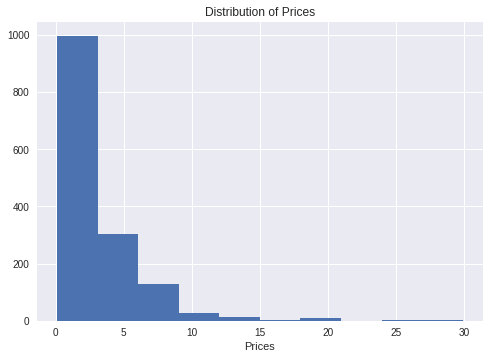

In [0]:
# Distribution of prices

import matplotlib.pyplot as plt
plt.hist(price)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.show()

In [0]:
# The Pystan model

stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.

data {  
    int<lower=1> N; // number of price values
    int<lower=1> N_neighbourhoods; // Number of neighbourhoods - 13
    int<lower=1> N_stores; // Number of stores - 4
    int<lower=1> N_brand; // Number of brands - 2
    int<lower=1> N_types; // Number of types of product - 10
    
    int<lower=0> store[N]; // 
    int<lower=0> neighbourhood[N];  
    int<lower=0> brand[N];
    int<lower=0> types[N];
    real<lower=0> prices[N];   
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.

parameters {
    real<lower=0> base_price[N_types] ;  // 
    real<lower=0> store_multiplier[N_stores] ;
    real<lower=0> brand_multiplier[N_brand] ;
    real<lower=0> neighbourhood_multiplier[N_neighbourhoods] ;
    
    real<lower=0> lambda ;
    real<lower=0> sigma2 ;
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    
    lambda ~ gamma(1,1);
    
    for (i in 1:N_types){ 
       base_price[i] ~ exponential(lambda);
    }  
    
    for (j in 1:N_brand){ 
       brand_multiplier[j] ~ cauchy(1,0.5);
    }
    
    for (k in 1:N_neighbourhoods){ 
       neighbourhood_multiplier[k] ~ cauchy(1,0.5);
    }
    
    for (m in 1:N_stores){ 
       store_multiplier[m] ~ cauchy(1,0.5) ;
    }
    
    sigma2 ~ cauchy(0,1);
    
    for(n in 1:N){
        prices[n] ~ normal(base_price[types[n]]*brand_multiplier[brand[n] +1]*store_multiplier[store[n]]*neighbourhood_multiplier[neighbourhood[n]],sqrt(sigma2)) ;
    }
    
    }

"""

In [0]:
data =  { 
        'store': store,
        'neighbourhood': area, 
        'brand': brand,
        'types': types,
        'prices': price,
        'N': len(price),
        'N_neighbourhoods':13,
        'N_stores': 4,
        'N_brand': 2,
        'N_types': 10,
}

In [0]:
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ebbcdf75d5dd852f78070bca21abb7d9 NOW.
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/tmpfr76d0zm/stanfit4anon_model_ebbcdf75d5dd852f78070bca21abb7d9_7613659209619248025.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [0]:
stan_results = stan_model.sampling(data=data)
print(stan_results)

Inference for Stan model: anon_model_ebbcdf75d5dd852f78070bca21abb7d9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price[1]                  1.26    0.02   0.58    0.5   0.86   1.16   1.52    2.8    720   1.01
base_price[2]                  0.85    0.01   0.39   0.33   0.58   0.78   1.02   1.86    740   1.01
base_price[3]                  2.04    0.03   0.92   0.81    1.4   1.87   2.45   4.58    711   1.01
base_price[4]                  0.74    0.01   0.35   0.28    0.5   0.67   0.89   1.66    758   1.01
base_price[5]                  0.66    0.01   0.32   0.24   0.45    0.6    0.8    1.5    768   1.01
base_price[6]                  1.49    0.03   0.68   0.59   1.03   1.37    1.8   3.25    709   1.01
base_price[7]                  0.56  9.6e-3   0.27   0.21   0.38   0.51   0.68   1.24    781   1.01
base_price[

In [0]:
# Processing the posteriors and the posterior predictive
posterior_samples = stan_results.extract()

In [0]:
store_multipliers = posterior_samples['store_multiplier']
brand_multipliers = posterior_samples['brand_multiplier']
neighbourhood_multipliers = posterior_samples['neighbourhood_multiplier']
base_prices = posterior_samples['base_price']

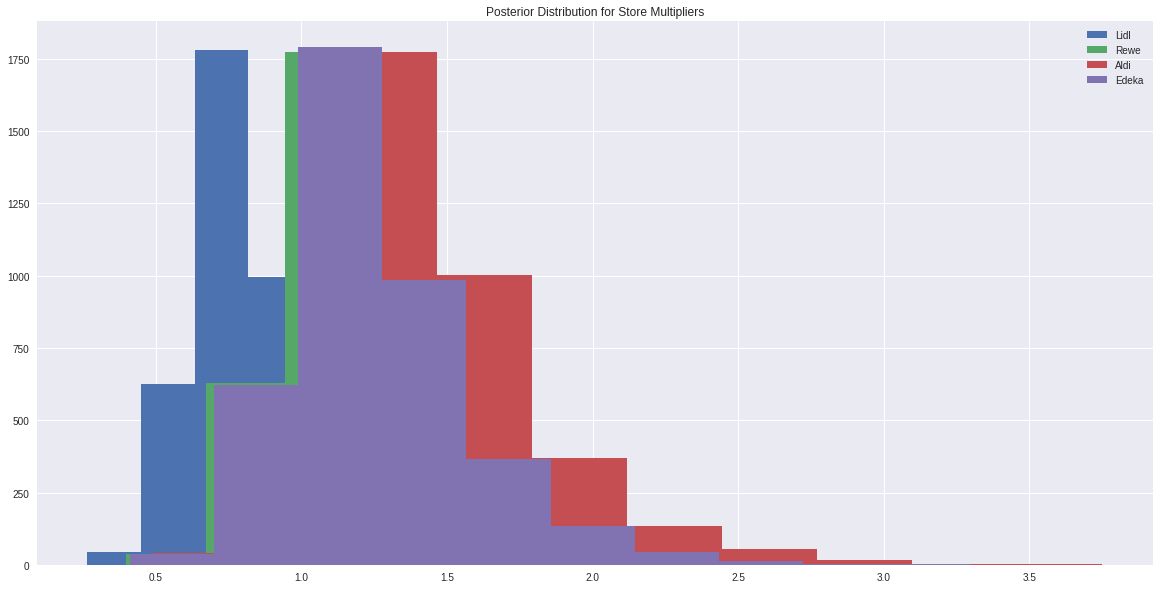

[0.8, 1.2, 1.45, 1.26]
[0.2, 0.3, 0.36, 0.31]


In [0]:
# Posterior Distributions for Store Multipliers
store_dict = ['Lidl','Rewe','Aldi','Edeka']
plt.figure(figsize=(20,10)) 

mean_stores = []
std_stores = []

for i in range(0,4):
  plt.hist(store_multipliers[:,i], label = store_dict[i] )
  mean_stores.append(round(np.mean(store_multipliers[:,i]),2))
  std_stores.append(round(np.std(store_multipliers[:,i]),2))
  
plt.title('Posterior Distribution for Store Multipliers')
plt.legend()
plt.show()

print(mean_stores)
print(std_stores)

In [0]:
print('T-tests for the store multipliers')


for store_index in range(0,4):
  for i in range(0,4):
    if store_index ==i: 
      continue
      
    z, p = sts.ttest_ind(store_multipliers[:,store_index], store_multipliers[:,i])
    if p > 0.05:
      print(str(store_dict[i]) + ' is not significantly more expensive than' + str(store_dict[store_index]))
    if p < 0.05: 
      if z < 0: 
        print(str(store_dict[i]) + ' is significantly more expensive than ' + str(store_dict[store_index]))
      if z > 0:
        print(str(store_dict[i]) + ' is significantly cheaper than ' + str(store_dict[store_index]))
        
  print('\n')

T-tests for the store multipliers
Rewe is significantly more expensive than Lidl
Aldi is significantly more expensive than Lidl
Edeka is significantly more expensive than Lidl


Lidl is significantly cheaper than Rewe
Aldi is significantly more expensive than Rewe
Edeka is significantly more expensive than Rewe


Lidl is significantly cheaper than Aldi
Rewe is significantly cheaper than Aldi
Edeka is significantly cheaper than Aldi


Lidl is significantly cheaper than Edeka
Rewe is significantly cheaper than Edeka
Aldi is significantly more expensive than Edeka




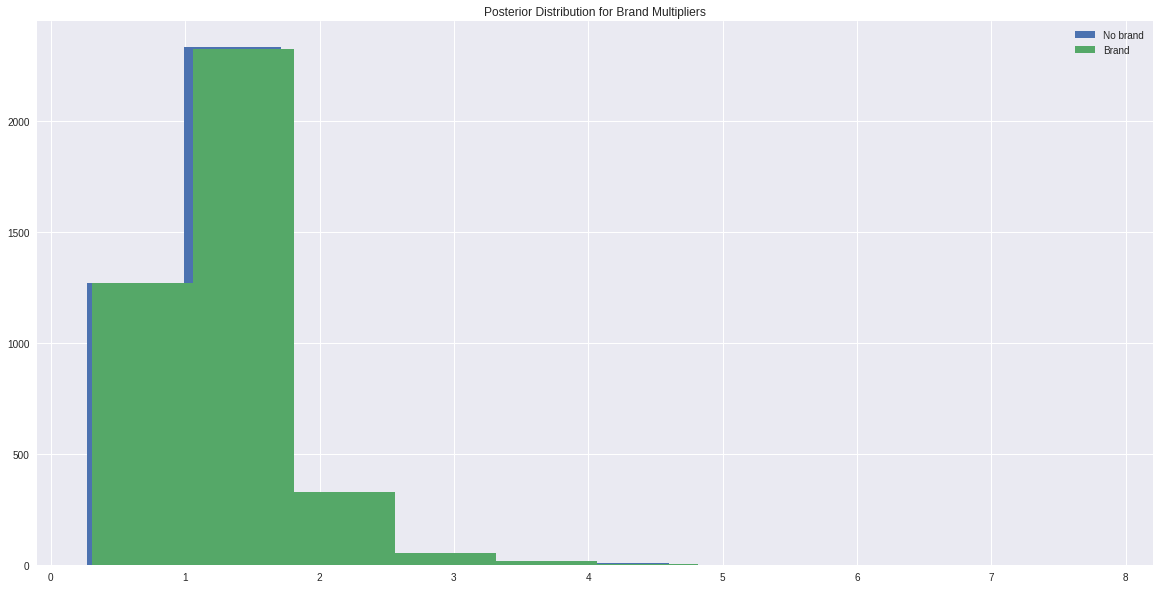

In [0]:
# Posterior Distributions for brand Multipliers
brand_dict = ['No brand', 'Brand']

plt.figure(figsize=(20,10)) 
for i in range(0,2):
  plt.hist(brand_multipliers[:,i], label = brand_dict[i] )
  
plt.title('Posterior Distribution for Brand Multipliers')
plt.legend()
plt.show()

In [0]:
print('T-tests for the brand multipliers')

stat, p = sts.ttest_ind(brand_multipliers[:,0], brand_multipliers[:,1])
if p > 0.05:
  print('Branded products are not significantly more expensive than non-branded products')
if p < 0.05: 
  if stat < 0: 
    print('Branded products are significantly more expensive than non-branded products')
  if stat > 0: 
    print('Non-Branded products are significantly more expensive than branded products')

print(100*(np.mean(brand_multipliers[:,1]) - np.mean(brand_multipliers[:,0]))/ np.mean(brand_multipliers[:,1]))

T-tests for the brand multipliers
Branded products are significantly more expensive than non-branded products
5.8290795868417336


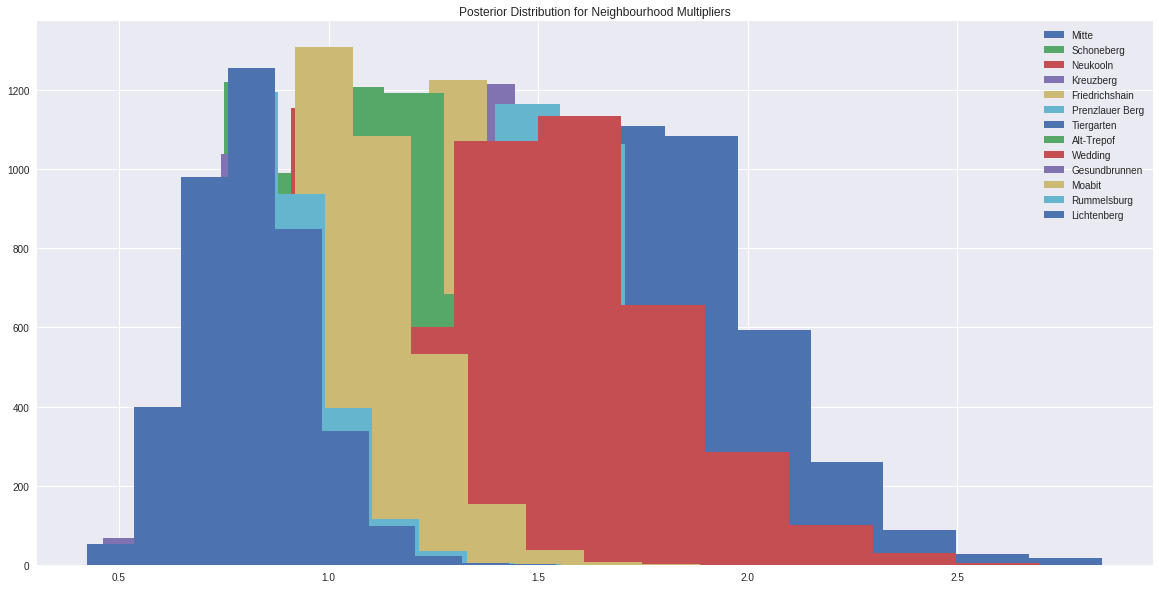

In [0]:
# Posterior Distributions for Neighbourhood Multipliers


neighbourhood_dict = ["Mitte","Schoneberg","Neukooln","Kreuzberg","Friedrichshain",
             "Prenzlauer Berg","Tiergarten","Alt-Trepof","Wedding",
             "Gesundbrunnen","Moabit","Rummelsburg","Lichtenberg"]
mean_neigh_multipliers = []
std_neigh_multipliers = []

plt.figure(figsize=(20,10)) 
for i in range(0,13):
  plt.hist(neighbourhood_multipliers[:,i], label = neighbourhood_dict[i] )
  mean_neigh_multipliers.append(round(np.mean(neighbourhood_multipliers[:,i]),2))
  std_neigh_multipliers.append(round(np.std(neighbourhood_multipliers[:,i]),2))
  
plt.title('Posterior Distribution for Neighbourhood Multipliers')
plt.legend()
plt.show()

Average base price of Apple is $1.2646619373904326
Average base price of Banana is $0.8486362715242465
Average base price of Tomatoes is $2.0350981948555678
Average base price of Potatoes is $0.7360167249413303
Average base price of Flour is $0.6643258277080252
Average base price of Rice is $1.488118868719514
Average base price of Milk is $0.562782983955239
Average base price of Butter is $2.279233331861604
Average base price of Eggs is $1.5326965217679087
Average base price of Chicken is $5.750747110914063


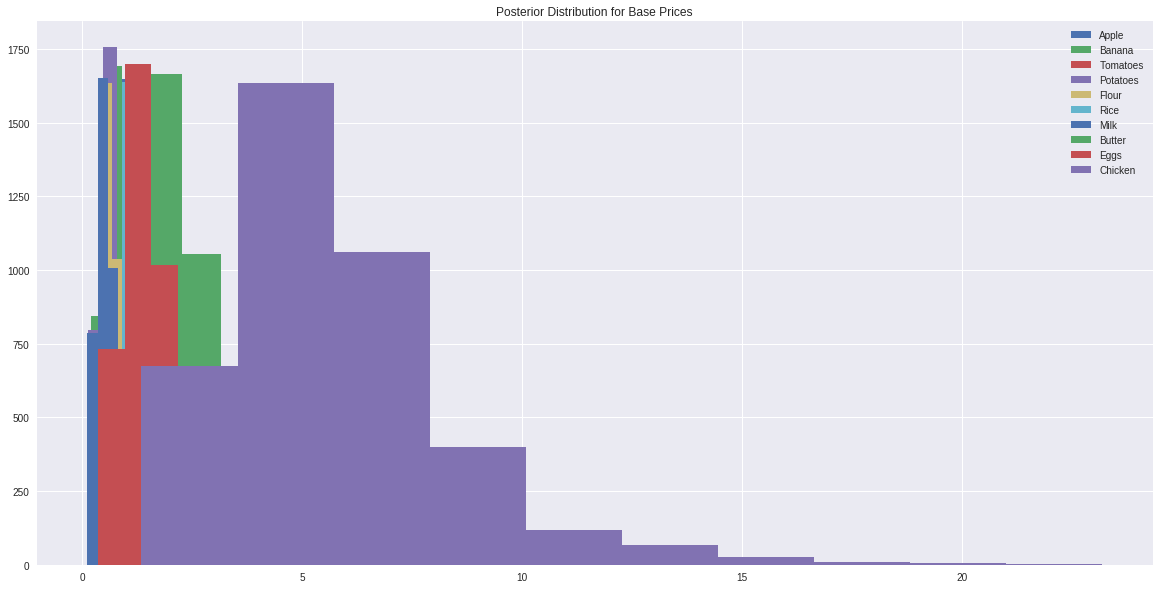

In [0]:
# Posterior Distributions for Base prices


type_dict = ["Apple","Banana","Tomatoes","Potatoes","Flour",
             "Rice","Milk","Butter","Eggs","Chicken"]

average_base_prices = []
plt.figure(figsize=(20,10)) 
for i in range(0,10):
  plt.hist(base_prices[:,i], label = type_dict[i] )
  print('Average base price of ' + str(type_dict[i]) + ' is $' + str(np.mean(base_prices[:,i])))
  average_base_prices.append(round(np.mean(base_prices[:,i]),2))
  
plt.title('Posterior Distribution for Base Prices')
plt.legend()
plt.show()

In [0]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sohitmiglani', api_key='0kpFCo9oR128M4DCYiIk')

In [0]:
# These are the average base prices

table = go.Table(
    header=dict(values=['Product', 'Average Base Price']),
    cells=dict(values=[type_dict,average_base_prices]))

final = [table]
layout = dict(width=600, height=600)
figure = dict(data=final, layout=layout)

py.iplot(figure, filename = 'Final Table - base price')

We also collect average rent prices in different neighborhoods and evaluate the correlation between neighborhood multipliers and rent prices. This helps us understand if there is a relationship between rent prices and grocery prices ine ach neighborhood

In [0]:
mean_mean_neigh = np.mean(mean_neigh_multipliers)
percentages_neigh = []
for i in range(0,13): 
  percent = round(100* (mean_neigh_multipliers[i] - 1), 2) 
  percentages_neigh.append(str(percent) +'%')
  
print(1.96*np.std(mean_neigh_multipliers))
print(mean_mean_neigh)

0.6252471075999714
1.1853846153846155


In [0]:
table = go.Table(
    header=dict(values=['Neighbourhood', 'Average Neighbourhood Multiplier', 'Percentage Higher/Lower', 'Standard Deviation']),
    cells=dict(values=[neighbourhood_dict,mean_neigh_multipliers,percentages_neigh, std_neigh_multipliers]))

final = [table]
layout = dict(width=1000, height=600)
figure = dict(data=final, layout=layout)

py.iplot(figure, filename = 'Final Table - neigh2')

In [0]:
#rental prices were gathered by locating the nearest train station to the corresponding location in the map,
#then extracting the prices from the nearest stations. In locations with lower train station density, less prices were obtained.

mitte = [1044,1048,1154,1090,1002,1090,999,902,942,893,932,957,1048]
schoneberg = [797,705,778,855,844,701,703,629,609,678,633,621,611]
neukooln = [812,872,820,743,801,836,757,617,640,680]
kreuzberg = [865,854,895,941,908,1005,934,826,1005]
friedrichschain = [976,877,846,842,942,892,809,863,976,736,752,809]
prenzauler_berg = [856,893,902,719,766,802,886,769,739]
tiergarten = [1048,957,859,916]
alt_tempelhof = [743,755,730,641]
wedding = [769,778,773,741,753]
gesundbrunnen = [802,893,739,746,719]
moabit = [932,957,886]
rummelsburg = [774,804,702]
lichtenburg = [739,736,752,809,734,691]

rental_prices = [np.mean(mitte),np.mean(schoneberg),np.mean(neukooln),np.mean(kreuzberg),np.mean(friedrichschain),
                 np.mean(prenzauler_berg), np.mean(tiergarten),np.mean(alt_tempelhof),np.mean(wedding),
                 np.mean(gesundbrunnen),np.mean(moabit),np.mean(rummelsburg),np.mean(lichtenburg)]

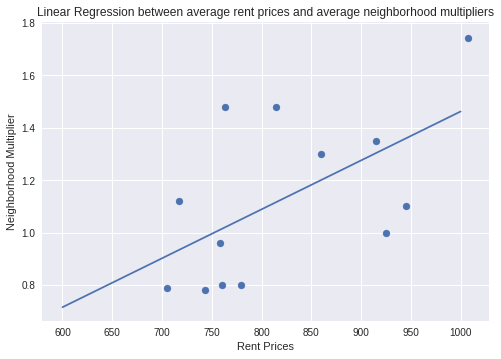

The pearsons coefficient of regression here is: 0.5766760310045943


In [0]:
x= sts.linregress(rental_prices, mean_neigh_multipliers)

slope = x[0]
intercept = x[1]
rvalue = x[2]

x = np.linspace(600,1000)

plt.scatter(rental_prices,mean_neigh_multipliers)
plt.plot(x,intercept + slope*x)
plt.title("Linear Regression between average rent prices and average neighborhood multipliers")
plt.xlabel('Rent Prices')
plt.ylabel('Neighborhood Multiplier')
plt.show()

print('The pearsons coefficient of regression here is: ' + str(rvalue))